In [16]:
pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd

# Load the .xls file (requires xlrd installed)
df = pd.read_excel('/Users/usufahmed/Desktop/LAND_MINE_APP/Mine_Dataset.xls', sheet_name='Information')  # or specify sheet name/index

# Save as CSV
df.to_csv('Mine_Dataset.csv', index=False)

In [37]:
import pandas as pd

# Load the .xls file (requires xlrd installed)
df = pd.read_excel('/Users/usufahmed/Desktop/LAND_MINE_APP/Mine_Dataset.xls', sheet_name='Normalized_Data')  # or specify sheet name/index

# Save as CSV
df.to_csv('Mine_Dataset.csv', index=False)

In [43]:
import pandas as pd
import numpy as np

# =======================
# 1. Load and clean dataset
# =======================

# The real data starts after the metadata rows, so we'll skip rows until finding the header: V,H,S,M
# (Assumes no comma or tab in data naming after V,H,S,M.)

df = pd.read_csv("/Users/usufahmed/Desktop/LAND_MINE_APP/Mine_Dataset.csv", header=None)

# Find where the actual header with ['V','H','S','M'] is
header_row = None
for i, row in df.iterrows():
    if list(row[:4]) == ['V', 'H', 'S', 'M']:
        header_row = i
        break

# Re-read the data with correct header and skiprows
df = pd.read_csv("/Users/usufahmed/Desktop/LAND_MINE_APP/Mine_Dataset.csv", skiprows=header_row+1, names=['V','H','S','M'])

# =======================
# 2. Convert all columns to numeric
# =======================
for col in ['V', 'H', 'S', 'M']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# =======================
# 3. Drop rows with missing values (or fill if small amount)
# =======================
print("Rows before dropping NA:", len(df))
df = df.dropna()
print("Rows after dropping NA:", len(df))

# =======================
# 4. Check for duplicates
# =======================
dupes = df.duplicated().sum()
print(f"Number of duplicate rows: {dupes}")
df = df.drop_duplicates()

# =======================
# 5. Verify target class (M) values are in 1-5
# =======================
print("Unique M values:", df['M'].unique())

# =======================
# 6. Prepare for ML
# Features and target
# =======================
features = ['V', 'H', 'S']
target = 'M'
X = df[features]
y = df[target].astype(int)

# =======================
# 7. Feature scaling
# =======================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =======================
# 8. Train-Test split
# =======================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print("X_train, y_train, X_test, y_test are now ready for modeling!")


Rows before dropping NA: 338
Rows after dropping NA: 338
Number of duplicate rows: 0
Unique M values: [1 2 3 4 5]
Train set: (270, 3), Test set: (68, 3)
X_train, y_train, X_test, y_test are now ready for modeling!


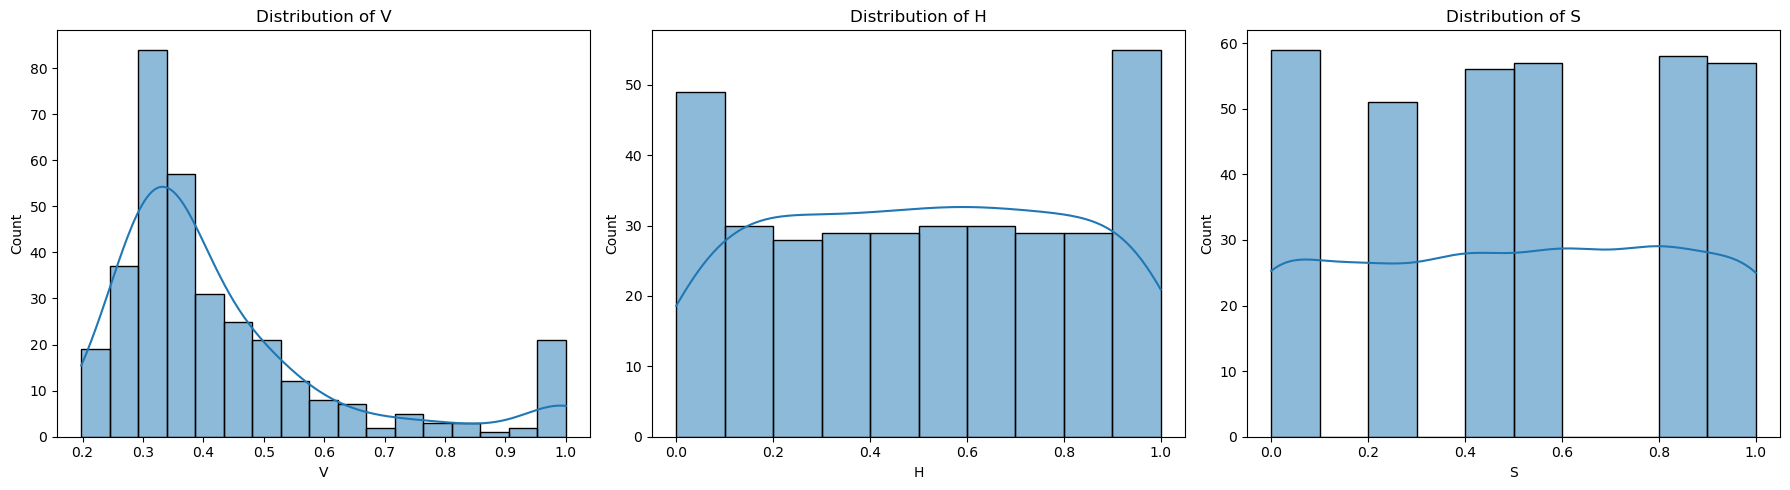

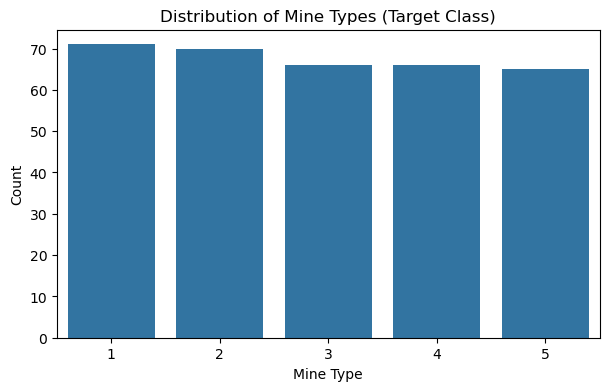

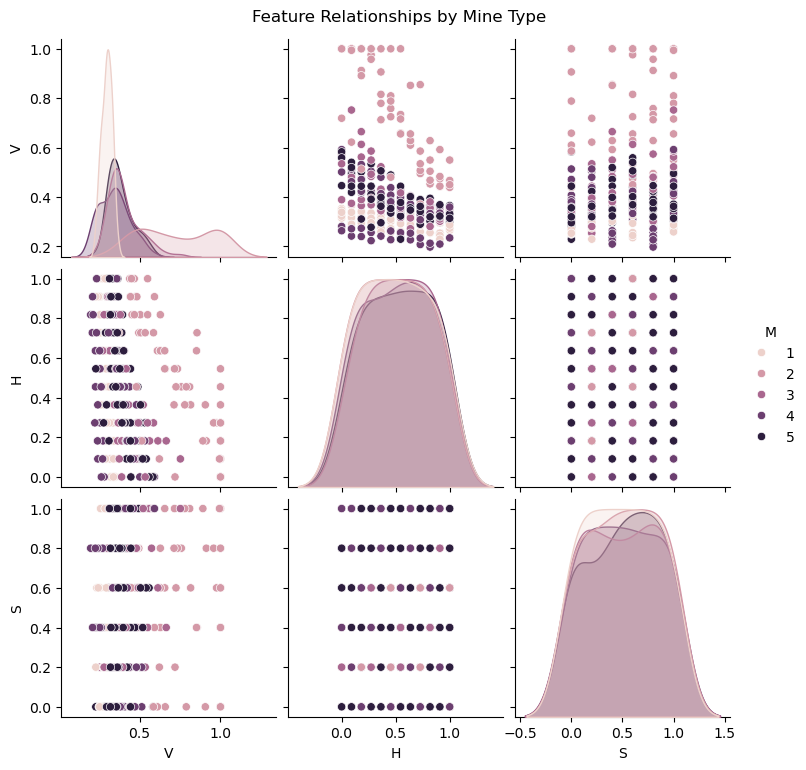

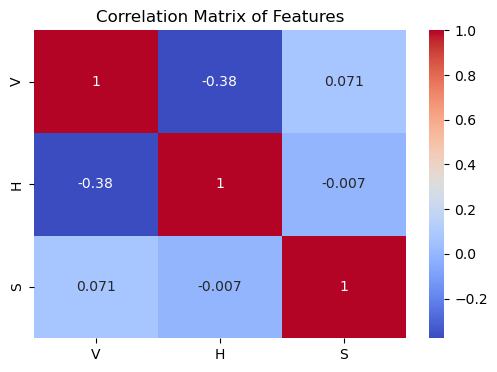

      V                                                                        \
  count      mean       std       min       25%       50%       75%       max   
M                                                                               
1  71.0  0.296463  0.031672  0.229607  0.273096  0.296586  0.320241  0.365861   
2  70.0  0.721123  0.222267  0.362537  0.505286  0.714501  0.998488  0.999999   
3  66.0  0.402408  0.098185  0.253776  0.339879  0.371601  0.441087  0.752265   
4  66.0  0.345365  0.092564  0.197734  0.263074  0.336858  0.407099  0.592144   
5  65.0  0.379598  0.076340  0.229607  0.323262  0.362537  0.422840  0.583081   

      H            ...                    S                                \
  count      mean  ...       75%  max count      mean       std  min  25%   
M                  ...                                                      
1  71.0  0.495519  ...  0.727273  1.0  71.0  0.492958  0.341143  0.0  0.2   
2  70.0  0.487013  ...  0.727273  1.0  70.0

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unscaled version for EDA
X_unscaled = df[['V', 'H', 'S']]
y = df['M']

# 1. Distribution plots for each feature (histogram)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['V', 'H', 'S']):
    sns.histplot(X_unscaled[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Class distribution (barplot)
plt.figure(figsize=(7, 4))
sns.countplot(x=y)
plt.title('Distribution of Mine Types (Target Class)')
plt.xlabel('Mine Type')
plt.ylabel('Count')
plt.show()

# 3. Pairplot: Feature relationships colored by class
sns.pairplot(pd.concat([X_unscaled, y], axis=1), hue='M', diag_kind='kde')
plt.suptitle('Feature Relationships by Mine Type', y=1.02)
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(X_unscaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Print descriptive statistics for all classes
print(df.groupby('M')[['V','H','S']].describe())


MOdel Trained
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.60      0.62        15
           2       0.78      1.00      0.88        14
           3       0.17      0.15      0.16        13
           4       0.43      0.23      0.30        13
           5       0.12      0.15      0.13        13

    accuracy                           0.44        68
   macro avg       0.43      0.43      0.42        68
weighted avg       0.44      0.44      0.43        68

Confusion Matrix:
 [[ 9  0  1  1  4]
 [ 0 14  0  0  0]
 [ 1  0  2  1  9]
 [ 1  4  3  3  2]
 [ 3  0  6  2  2]]


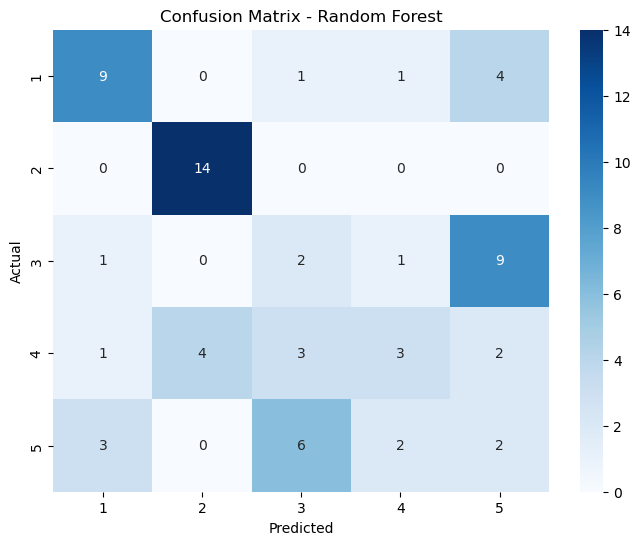

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have:
# X_train, X_test, y_train, y_test from previous steps

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("MOdel Trained")

# Make predictions
y_pred = rf.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting Confusion Matrix for visual analysis
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Feature ranking:
V: 0.6815
H: 0.1878
S: 0.1307


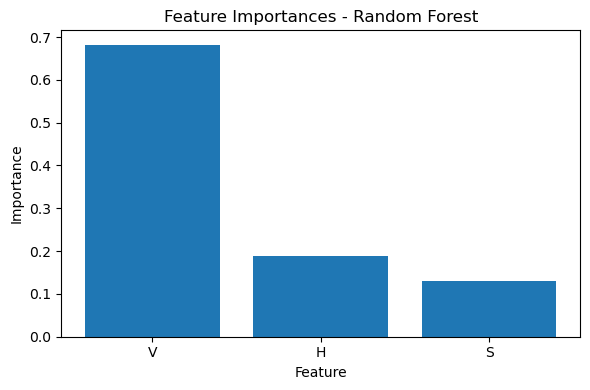

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from trained model
importances = rf.feature_importances_
features = ['V', 'H', 'S']
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

# Visualize
plt.figure(figsize=(6,4))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
